In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path
import os
import shutil
import torch
from torchvision import models
from sklearn.metrics import silhouette_score

# Clusterização por Histograma de Cor

In [2]:
pasta = 'images'
destino = 'images_png'

os.makedirs(destino, exist_ok=True)

for nome_arquivo in os.listdir(pasta):
    caminho = os.path.join(pasta, nome_arquivo)
    if os.path.isfile(caminho):
        try:
            img = cv2.imread(caminho, cv2.IMREAD_UNCHANGED)
            if img is not None:
                nome_base = os.path.splitext(nome_arquivo)[0]
                novo_caminho = os.path.join(destino, f'{nome_base}.png')
                cv2.imwrite(novo_caminho, img)
        except Exception as e:
            print(f'Erro com {nome_arquivo}: {e}')


C:\Users\pedro23013\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\pedro23013\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


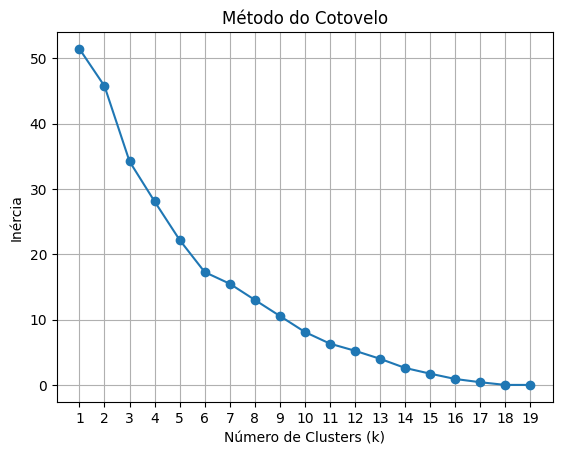

In [3]:
destino = 'images_png'
dados = []
nomes = []

for nome_arquivo in os.listdir(destino):
    caminho = os.path.join(destino, nome_arquivo)
    img = cv2.imread(caminho)
    if img is None:
        continue
    hist_bgr = []
    for i in range(3):  # canais BGR
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()  # normaliza e achata
        hist_bgr.append(hist)
    vetor = np.concatenate(hist_bgr)
    dados.append(vetor)
    nomes.append(nome_arquivo)

dados = np.array(dados)

ks = range(1, 20)
inercia = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(dados)
    inercia.append(kmeans.inertia_)

plt.plot(ks, inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.grid(True)
plt.show()

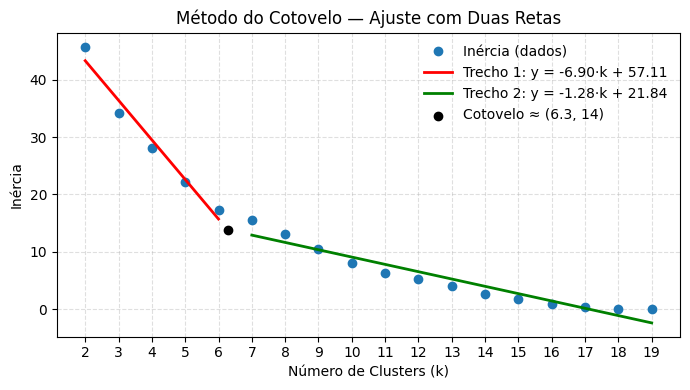

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
 
# --- 1. Dados ---
ks = np.arange(2, 20)              # [2, 3, …, 19] -> 18 pontos
inercia = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(dados)
    inercia.append(kmeans.inertia_)
inercia = np.array(inercia)
 
assert len(ks) == len(inercia), "ks e inercia precisam ter o mesmo tamanho"
 
# --- 2. Segmentos ---
first_seg  = slice(0, 5)
second_seg = slice(5, None)
 
X1, y1 = ks[first_seg].reshape(-1, 1), inercia[first_seg]
X2, y2 = ks[second_seg].reshape(-1, 1), inercia[second_seg]
 
# --- 3. Ajustes lineares ---
reg1 = LinearRegression().fit(X1, y1)
reg2 = LinearRegression().fit(X2, y2)
 
y1_fit = reg1.predict(X1)
y2_fit = reg2.predict(X2)
 
# --- 4. Ponto de intersecção (opcional) ---
a1, b1 = reg1.coef_[0], reg1.intercept_
a2, b2 = reg2.coef_[0], reg2.intercept_
x_star = (b2 - b1) / (a1 - a2)
y_star = a1 * x_star + b1
 
# --- 5. Gráfico ---
plt.figure(figsize=(7,4))
plt.plot(ks, inercia, 'o', label='Inércia (dados)')
plt.plot(X1.ravel(), y1_fit, '-r', lw=2,
         label=f'Trecho 1: y = {a1:.2f}·k + {b1:.2f}')
plt.plot(X2.ravel(), y2_fit, '-g', lw=2,
         label=f'Trecho 2: y = {a2:.2f}·k + {b2:.2f}')
plt.scatter([x_star], [y_star], c='k', zorder=5,
            label=f'Cotovelo ≈ ({x_star:.1f}, {y_star:.0f})')
plt.title('Método do Cotovelo — Ajuste com Duas Retas')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.grid(True, ls='--', alpha=.4)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('metodo_cotovelo_hist.png', dpi=300, format='png')
plt.show()

In [4]:
k = 6  # número de clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(dados)
labels = kmeans.labels_

# Mostrar imagens por cluster
for i in range(k):
    print(f'\nCluster {i}:')
    for nome, label in zip(nomes, labels):
        if label == i:
            print(f' - {nome}')


Cluster 0:
 - Clarice-imagem-3-post-hora-da-estrela-IMS.png
 - Clarice-imagem-4-post-sopro-de-vida-IMS.png
 - mss1284077.png

Cluster 1:
 - EC[Letras]_13-IMS.png
 - EC[Letras]_14-IMS.png
 - EC[Manuscritos]_06-IMS.png

Cluster 2:
 - CF00043_03.png
 - CF00047_03.png
 - CF00056_02.png
 - CF00063_03.png
 - CF00074_01.png

Cluster 3:
 - 01-semdata-1_Domingos Alves Branco Moniz Barreto_1748.png
 - EC[Letras]_21.png
 - mss1298868.png
 - mss1310389.png

Cluster 4:
 - 66-JMS-19-03-1906-1.png
 - Clarice-imagem-1-post-Fabio-datiloscrito-IMS.png
 - mss1311750.png

Cluster 5:
 - 01-PVC-01-05-1500-1_pero_vaz.png
 - 02-MEP-07-08-1942-1.png
 - 107-NIN-29-07-1986-1.png
 - EC[Manuscritos]_01-IMS.png


In [5]:
diretorio_src = 'img_clusters'
destino = 'images_png'

if os.path.exists(diretorio_src):
    shutil.rmtree(diretorio_src)
os.makedirs(diretorio_src)

k = len(set(labels))
pastas_clusters = {}
for i in range(k):
    path = os.path.join(diretorio_src, f'cluster_{i}')
    os.makedirs(path)
    pastas_clusters[i] = path

for nome, label in zip(nomes, labels):
    src = os.path.join(destino, nome)
    dst = os.path.join(pastas_clusters[label], nome)
    shutil.copy(src, dst)


PermissionError: [WinError 5] Acesso negado: 'img_clusters\\cluster_0'

# Clusterização por CNN

In [7]:
from pathlib import Path
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import models

# ---------- CONFIG ------------------------------------------------------------
IMG_DIR     = Path("images_png")           # pasta com suas imagens
BATCH_SIZE  = 32
DEVICE      = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)  # ImageNet
std  = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)  # ImageNet

# ---------- DATASET BASEADO EM OpenCV -----------------------------------------
class OpenCVDataset(Dataset):
    def __init__(self, root: Path):
        self.paths = sorted([p for p in root.iterdir()
                             if p.suffix.lower() in
                             {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}])
        if not self.paths:
            raise RuntimeError(f"Nenhuma imagem em {root}")

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        path = self.paths[idx]
        img  = cv2.imread(str(path), cv2.IMREAD_COLOR)       # BGR uint8
        if img is None:
            raise RuntimeError(f"Falhou ao ler {path}")
        img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)          # BGR → RGB
        img  = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
        img  = torch.from_numpy(img).permute(2, 0, 1).float() / 255.0  # (C,H,W) float32 0-1
        img  = (img - mean) / std                            # normaliza
        return img, path.name

ds  = OpenCVDataset(IMG_DIR)
ldr = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# ---------- MODELO: VGG-16 SEM A CABEÇA Densa -------------------------------
vgg      = models.vgg16(weights="DEFAULT")
feature_net = torch.nn.Sequential(
    vgg.features,
    torch.nn.AdaptiveAvgPool2d((1, 1)),   # global avg-pool → (N,512,1,1)
    torch.nn.Flatten()                    # → (N, 512)
).to(DEVICE).eval()

# ---------- EXTRAÇÃO ----------------------------------------------------------
vectors, nomes = [], []

with torch.no_grad():
    for imgs, names in ldr:
        imgs = imgs.to(DEVICE)
        feats = feature_net(imgs).cpu().numpy()   # shape (batch, 512)
        vectors.extend(feats)                     # lista de np.ndarray
        nomes.extend(names)

print(f"Extraídos {len(vectors)} vetores de {len(ds)} imagens.")
print("Exemplo shape:", vectors[0].shape)  # (512,)

# ---------- (Opcional) empilhar em único array -------------------------------
X = np.vstack(vectors)  # shape (N, 512)
# np.save("features_vgg16.npy", X)         # salva se quiser


Extraídos 22 vetores de 22 imagens.
Exemplo shape: (512,)


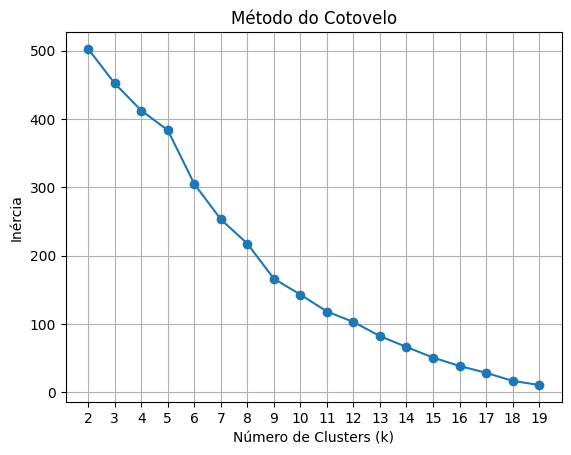

In [13]:
ks = range(2, 20)
inercia = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(vectors)
    inercia.append(kmeans.inertia_)

plt.plot(ks, inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.grid(True)
plt.show()

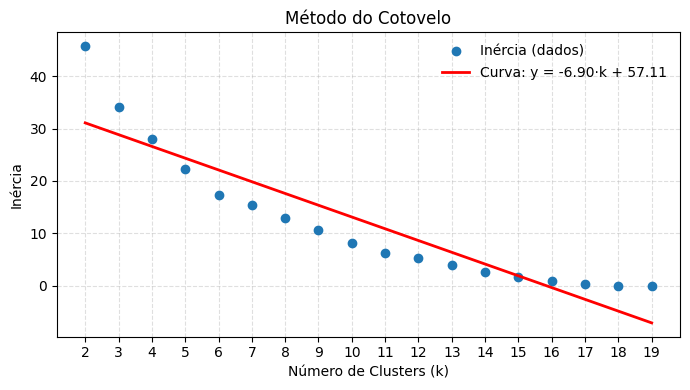

In [11]:
X3, y3 = ks.reshape(-1, 1), inercia

reg3 = LinearRegression().fit(X3, y3)

y3_fit = reg3.predict(X3)

a3, b3 = reg1.coef_[0], reg1.intercept_
# --- 5. Gráfico ---
plt.figure(figsize=(7,4))
plt.plot(ks, inercia, 'o', label='Inércia (dados)')
plt.plot(X3.ravel(), y3_fit, '-r', lw=2,
         label=f'Curva: y = {a3:.2f}·k + {b3:.2f}')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.grid(True, ls='--', alpha=.4)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('metodo_cotovelo_cnn.png', dpi=300, format='png')
plt.show()

K=2   silhouette=0.1447
K=3   silhouette=0.1010
K=4   silhouette=0.1006
K=5   silhouette=0.0993
K=6   silhouette=0.1108
K=7   silhouette=0.1164
K=8   silhouette=0.0786
K=9   silhouette=0.0929
K=10  silhouette=0.1101
K=11  silhouette=0.1206
K=12  silhouette=0.1092
K=13  silhouette=0.0956
K=14  silhouette=0.1053
K=15  silhouette=0.1169
K=16  silhouette=0.1245
K=17  silhouette=0.1466
K=18  silhouette=0.1179
K=19  silhouette=0.0924

Melhor K pelo silhouette: 17


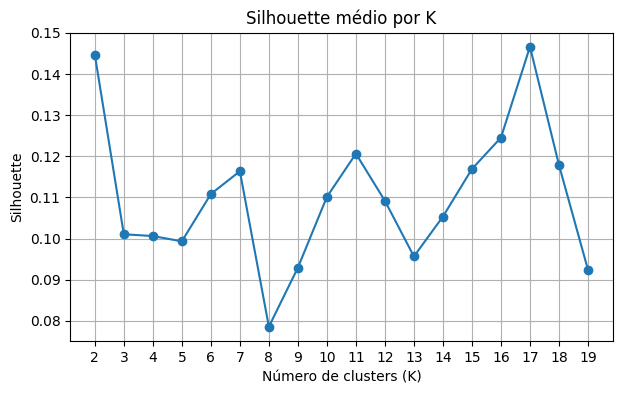

In [13]:
scores = []

for k in ks:
    labels = KMeans(n_clusters=k, n_init="auto", random_state=42) \
             .fit_predict(vectors)
    score  = silhouette_score(vectors, labels)
    scores.append(score)
    print(f"K={k:<2}  silhouette={score:.4f}")

best_k = ks[int(np.argmax(scores))]
print("\nMelhor K pelo silhouette:", best_k)

# --- gráfico opcional ---
plt.figure(figsize=(7,4))
plt.plot(ks, scores, marker="o")
plt.xticks(ks)
plt.title("Silhouette médio por K")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette")
plt.grid(True)
plt.savefig('silhueta_cnn.png', dpi=300, format='png')
plt.show()

# Clusterização CNN com K = 2

In [15]:
k = 2  # número de clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(vectors)
labels = kmeans.labels_

# Mostrar imagens por cluster
for i in range(k):
    print(f'\nCluster {i}:')
    for nome, label in zip(nomes, labels):
        if label == i:
            print(f' - {nome}')


Cluster 0:
 - 01-semdata-1_Domingos Alves Branco Moniz Barreto_1748.png
 - 66-JMS-19-03-1906-1.png
 - CF00047_03.png
 - CF00056_02.png
 - Clarice-imagem-1-post-Fabio-datiloscrito-IMS.png
 - Clarice-imagem-3-post-hora-da-estrela-IMS.png
 - Clarice-imagem-4-post-sopro-de-vida-IMS.png
 - mss1284077.png
 - mss1298868.png
 - mss1310389.png

Cluster 1:
 - 01-PVC-01-05-1500-1_pero_vaz.png
 - 02-MEP-07-08-1942-1.png
 - 107-NIN-29-07-1986-1.png
 - CF00043_03.png
 - CF00063_03.png
 - CF00074_01.png
 - EC[Letras]_13-IMS.png
 - EC[Letras]_14-IMS.png
 - EC[Letras]_21.png
 - EC[Manuscritos]_01-IMS.png
 - EC[Manuscritos]_06-IMS.png
 - mss1311750.png


In [16]:
diretorio_src = 'img_clusters_cnn_k2'
destino = 'images_png'

if os.path.exists(diretorio_src):
    shutil.rmtree(diretorio_src)
os.makedirs(diretorio_src)

k = len(set(labels))
pastas_clusters = {}
for i in range(k):
    path = os.path.join(diretorio_src, f'cluster_{i}')
    os.makedirs(path)
    pastas_clusters[i] = path

for nome, label in zip(nomes, labels):
    src = os.path.join(destino, nome)
    dst = os.path.join(pastas_clusters[label], nome)
    shutil.copy(src, dst)


# Clusterização CNN com K=17

In [22]:
k = 17  # número de clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(vectors)
labels = kmeans.labels_

# Mostrar imagens por cluster
for i in range(k):
    print(f'\nCluster {i}:')
    for nome, label in zip(nomes, labels):
        if label == i:
            print(f' - {nome}')


Cluster 0:
 - Clarice-imagem-4-post-sopro-de-vida-IMS.png
 - mss1284077.png

Cluster 1:
 - EC[Letras]_13-IMS.png
 - EC[Letras]_14-IMS.png

Cluster 2:
 - CF00047_03.png
 - CF00056_02.png

Cluster 3:
 - 66-JMS-19-03-1906-1.png

Cluster 4:
 - mss1310389.png

Cluster 5:
 - mss1298868.png

Cluster 6:
 - 01-semdata-1_Domingos Alves Branco Moniz Barreto_1748.png

Cluster 7:
 - 02-MEP-07-08-1942-1.png

Cluster 8:
 - 107-NIN-29-07-1986-1.png

Cluster 9:
 - 01-PVC-01-05-1500-1_pero_vaz.png

Cluster 10:
 - mss1311750.png

Cluster 11:
 - CF00043_03.png
 - EC[Manuscritos]_06-IMS.png

Cluster 12:
 - EC[Manuscritos]_01-IMS.png

Cluster 13:
 - EC[Letras]_21.png

Cluster 14:
 - CF00063_03.png
 - CF00074_01.png

Cluster 15:
 - Clarice-imagem-1-post-Fabio-datiloscrito-IMS.png

Cluster 16:
 - Clarice-imagem-3-post-hora-da-estrela-IMS.png


In [23]:
diretorio_src = 'img_clusters_cnn_k17'
destino = 'images_png'

if os.path.exists(diretorio_src):
    shutil.rmtree(diretorio_src)
os.makedirs(diretorio_src)

k = len(set(labels))
pastas_clusters = {}
for i in range(k):
    path = os.path.join(diretorio_src, f'cluster_{i}')
    os.makedirs(path)
    pastas_clusters[i] = path

for nome, label in zip(nomes, labels):
    src = os.path.join(destino, nome)
    dst = os.path.join(pastas_clusters[label], nome)
    shutil.copy(src, dst)
